# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family=['YouYuan', 'Times New Roman']) #设置中文图例
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\Logic\AppData\Local\Temp\ipykernel_30524\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

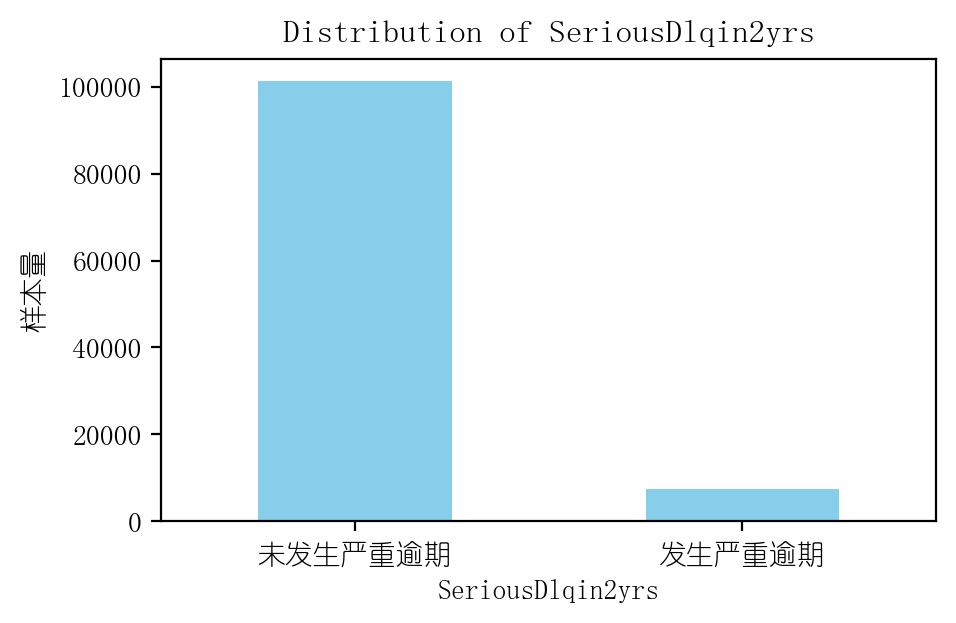

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
Positive_Negative = data['SeriousDlqin2yrs'].value_counts()
Positive_Negative

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
plt.figure(figsize=(5, 3), dpi=200) #设置图片大小
Positive_Negative.plot(kind = 'bar', color='skyblue')
plt.title('Distribution of SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('样本量')
plt.xticks(ticks=[0, 1], labels=['未发生严重逾期', '发生严重逾期'], rotation=0)
plt.show()

#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

# 计算年龄的分桶边界
age_min = data['age'].min()
age_max = data['age'].max()
bins = list(range(int(age_min), int(age_max) + 3, 3)) # 每3岁一个区间

# 使用pandas的cut函数进行离散化
# data['age_bins'] = pd.cut(data['age'], bins=bins)
# X_train['age_bins'] = pd.cut(X_train['age'], bins=bins)
# X_test['age_bins'] = pd.cut(X_test['age'], bins=bins)

data['age'] = pd.cut(data['age'], bins=bins)
X_train['age'] = pd.cut(X_train['age'], bins=bins)
X_test['age'] = pd.cut(X_test['age'], bins=bins)

# 查看离散化后的结果
# data['age_bins'].value_counts().sort_index()
data['age'].value_counts().sort_index()




age
(0, 3]           0
(3, 6]           0
(6, 9]           0
(9, 12]          0
(12, 15]         0
(15, 18]         0
(18, 21]       104
(21, 24]      1313
(24, 27]      2620
(27, 30]      4083
(30, 33]      5053
(33, 36]      5272
(36, 39]      6288
(39, 42]      7085
(42, 45]      7697
(45, 48]      8443
(48, 51]      8438
(51, 54]      7960
(54, 57]      7490
(57, 60]      7049
(60, 63]      7467
(63, 66]      5524
(66, 69]      4439
(69, 72]      3334
(72, 75]      2708
(75, 78]      2166
(78, 81]      1718
(81, 84]       990
(84, 87]       725
(87, 90]       446
(90, 93]       173
(93, 96]        43
(96, 99]        15
(99, 102]        3
(102, 105]       1
Name: count, dtype: int64

#### 3.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

# 对分箱后的年龄段进行独热向量编码
# data_age_bins_dummies = pd.get_dummies(data, columns=['age_bins'], prefix='Age')
# X_train_age_bins_dummies = pd.get_dummies(X_train, columns=['age_bins'], prefix='Age')
# X_test_age_bins_dummies = pd.get_dummies(X_test, columns=['age_bins'], prefix='Age')

# data = pd.get_dummies(data, columns=['age_bins'], prefix='Age')
# X_train = pd.get_dummies(X_train, columns=['age_bins'], prefix='Age')
# X_test = pd.get_dummies(X_test, columns=['age_bins'], prefix='Age')

data = pd.get_dummies(data, columns=['age'], prefix_sep='_',dummy_na=False,drop_first=False)
X_train = pd.get_dummies(X_train, columns=['age'], prefix_sep='_',dummy_na=False,drop_first=False)
X_test = pd.get_dummies(X_test, columns=['age'], prefix_sep='_',dummy_na=False,drop_first=False)

# 展示编码后的部分数据
# age_bins_dummies.head()
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(0, 3]","age_(3, 6]","age_(6, 9]","age_(9, 12]","age_(12, 15]","age_(15, 18]","age_(18, 21]","age_(21, 24]","age_(24, 27]","age_(27, 30]","age_(30, 33]","age_(33, 36]","age_(36, 39]","age_(39, 42]","age_(42, 45]","age_(45, 48]","age_(48, 51]","age_(51, 54]","age_(54, 57]","age_(57, 60]","age_(60, 63]","age_(63, 66]","age_(66, 69]","age_(69, 72]","age_(72, 75]","age_(75, 78]","age_(78, 81]","age_(81, 84]","age_(84, 87]","age_(87, 90]","age_(90, 93]","age_(93, 96]","age_(96, 99]","age_(99, 102]","age_(102, 105]"
0,1,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [10]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

# 选择连续值特征进行幅度缩放
continuous_features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate',
                       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse']

# 初始化幅度缩放器
sc = StandardScaler()

# 对连续值特征进行幅度缩放
# data_scaled = data.copy()
# data_scaled[continuous_features] = sc.fit_transform(data[continuous_features])
# data_scaled = sc.fit_transform(data)

# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.fit_transform(X_test)


X_train = sc.fit_transform(X_train[continuous_features])
X_test = sc.fit_transform(X_test[continuous_features])
X_train_std = X_train
X_test_std = X_test

# 展示缩放后的部分数据
# data_scaled.head()

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [11]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# X_scaled = data_scaled[continuous_features]
# y = data['SeriousDlqin2yrs']

# 划分数据处理后的训练集和测试集
# X_train_std, X_test_std, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 初始化逻辑回归模型
# lr = LogisticRegression()
lr = LogisticRegression(solver='liblinear',max_iter=100)  # 使用liblinear求解器，因为它支持L1正则化

# 训练模型
lr.fit(X_train_std, y_train)

# 获取模型的系数
coefficients = lr.coef_[0]

# 创建系数和特征名称的DataFrame
feature_coefficients = pd.DataFrame({
    # 'Feature': X_train.columns[0:],
    'Feature': continuous_features,
    'Coefficient': coefficients
})

feature_coefficients
# coefficients

,Feature,Coefficient
0,RevolvingUtilizationOfUnsecuredLines,-0.011995
1,DebtRatio,0.360023
2,MonthlyIncome,-0.097519
3,NumberOfTime30-59DaysPastDueNotWorse,1.778568
4,NumberOfTimes90DaysLate,1.736049
5,NumberOfOpenCreditLinesAndLoans,-0.180605
6,NumberRealEstateLoansOrLines,-0.228602
7,NumberOfTime60-89DaysPastDueNotWorse,-3.339019


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [12]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

from sklearn.model_selection import GridSearchCV

# 按照要求准备网格字典
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

# 初始化逻辑回归模型
# lr = LogisticRegression(solver='liblinear',max_iter=100)  # 使用liblinear求解器，因为它支持L1正则化

# 初始化网格搜索
# grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search = GridSearchCV(lr, param_grid,cv = 5)

# 执行网格搜索
grid_search.fit(X_train_std, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [13]:
# 输出最好的超参数
# 输出最好的模型

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

best_params, best_score, best_model

print("最好超参数：", best_params)
print("最好评分：", best_score)
print("最好模型：", best_model)

最好超参数： {'C': 10, 'penalty': 'l1'}
最好评分： 0.9332702219763709
最好模型： LogisticRegression(C=10, penalty='l1', solver='liblinear')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [14]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

y_pred = best_model.predict(X_test_std)

# 计算各种测试指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 计算auc
y_pred_proba = best_model.predict_proba(X_test_std)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

accuracy, recall, auc, conf_matrix, f1

print("accuracy：\t", accuracy)
print("recall：\t", recall)
print("f1：\t", f1)
print("conf_matrix：\n", conf_matrix)
print("auc：\t", auc)


accuracy：	 0.9337628470624328
recall：	 0.5209430120321262
f1：	 0.08244793880152997
conf_matrix：
 [[30339    85]
 [ 2074    97]]
auc：	 0.6782203584699369


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [15]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.metrics import classification_report, confusion_matrix

y_pred_proba = best_model.predict_proba(X_test_std)

# 设置阈值为0.3
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 根据阈值判断最终结果
for i in range(len(threshold)):
    y_pred_adjusted = (y_pred_proba[:, 1] > threshold[i]).astype(int)

    # 重新计算性能评估指标
    # classification_report_adjusted = classification_report(y_test, y_pred_adjusted)
    confusion_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

    # 计算各种测试指标
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted,average='macro')
    f1 = f1_score(y_test, y_pred_adjusted)
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

    print(accuracy)
    print(recall)
    print(conf_matrix)
    print(f1)

    # 分类报告 
    # print(classification_report_adjusted)
    # 混淆矩阵
    print(confusion_matrix_adjusted)
    print("\n")

0.8712685994784476
0.6495828101478226
[[27544  2880]
 [ 1316   855]]
0.2895360650186251
[[27544  2880]
 [ 1316   855]]


0.9283018867924528
0.5800412136143579
[[29871   553]
 [ 1784   387]]
0.24879459980713595
[[29871   553]
 [ 1784   387]]


0.9335480901978831
0.5497009909265794
[[30197   227]
 [ 1939   232]]
0.176425855513308
[[30197   227]
 [ 1939   232]]


0.9340696425832183
0.5324426896121792
[[30296   128]
 [ 2021   150]]
0.12249897917517355
[[30296   128]
 [ 2021   150]]


0.9337628470624328
0.5209430120321262
[[30339    85]
 [ 2074    97]]
0.08244793880152997
[[30339    85]
 [ 2074    97]]


0.9341003221352968
0.5159908090935991
[[30374    50]
 [ 2098    73]]
0.06364428945074106
[[30374    50]
 [ 2098    73]]


0.9337935266145114
0.5106934838831813
[[30388    36]
 [ 2122    49]]
0.04343971631205674
[[30388    36]
 [ 2122    49]]


0.9333946924374904
0.5029942390749963
[[30410    14]
 [ 2157    14]]
0.01273306048203729
[[30410    14]
 [ 2157    14]]


0.9333640128854118
0.501052

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [24]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.feature_selection import SelectFromModel

# sorted_indices = abs(coefficients).argsort()[::-1]
# coefficients, sorted_indices

# 计算系数的绝对值
feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()

# 按照绝对值大小对特征进行排序
sorted_features = feature_coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
sorted_features
print(sorted_features)
print("\n")

# # lr_for_selection = LogisticRegression(max_iter=1000)
# lr_for_selection = LogisticRegression(C=10, penalty='l2' ,solver='liblinear')
# sfm_lr = SelectFromModel(lr_for_selection)
# sfm_lr.fit(X_train_std, y_train)

# # 特征选择
# # selected_features_lr = X_train_std.columns[sfm_lr.get_support()]
# selected_features_lr = X_train_std

# selected_features_lr

# # Selecting only the features identified by SelectFromModel
# X_selected = X_train_std[selected_features_lr]

# # Splitting the data into training and testing sets
# X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_train, test_size=0.3, random_state=0)

# # Creating a new logistic regression model
# lr_new = LogisticRegression(C=10, penalty='l2' ,solver='liblinear')
# lr_new.fit(X_train_selected, y_train_selected)

# # Predicting on the test set
# y_pred = lr_new.predict(X_test_selected)

# # Calculating accuracy and other metrics
# accuracy = accuracy_score(y_test_selected, y_pred)
# recall = recall_score(y_test_selected, y_pred,average='macro')
# conf_matrix = confusion_matrix(y_test_selected, y_pred)
# class_report = classification_report(y_test_selected, y_pred)

# accuracy, conf_matrix

# print(accuracy)
# print(recall)
# print(class_report)
# print(conf_matrix)




# 训练逻辑回归模型
lr_for_selection = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_for_selection.fit(X_train_std, y_train)

# 从模型中获取系数
coefficients = lr_for_selection.coef_[0]

# 创建一个DataFrame来保存系数及其绝对值
feature_coefficients = pd.DataFrame({'Feature': feature_coefficients['Feature'], 'Coefficient': coefficients})
feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()

# 使用 SelectFromModel 进行特征选择
sfm_lr = SelectFromModel(lr_for_selection, threshold='mean')  # 可以调整阈值
sfm_lr.fit(X_train_std, y_train)

# 获取被选中的特征
# selected_features_lr = X_train_std.columns[sfm_lr.get_support()]
# 获取被选中的特征的布尔索引
selected_features_bool = sfm_lr.get_support()

# 使用布尔索引选择特征
X_selected = X_train_std[:, selected_features_bool]

# 查看哪些特征被选中
selected_feature_names = [feature_coefficients['Feature'][i] for i in range(len(feature_coefficients['Feature'])) if selected_features_bool[i]]
print("Selected features:", selected_feature_names)

# 仅选择被选中的特征
# X_selected = X_train_std[selected_features_lr]

# 分割数据集
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_train, test_size=0.3, random_state=0)

# 创建一个新的逻辑回归模型
lr_new = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_new.fit(X_train_selected, y_train_selected)

# 在测试集上进行预测
y_pred = lr_new.predict(X_test_selected)

# 计算准确率和其他度量
accuracy = accuracy_score(y_test_selected, y_pred)
recall = recall_score(y_test_selected, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test_selected, y_pred)
class_report = classification_report(y_test_selected, y_pred)
score = lr_new.score(X_test_selected,y_test_selected)

# 输出结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("\n")
print(class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Score:", score)


                                Feature  Coefficient  Absolute_Coefficient
7  NumberOfTime60-89DaysPastDueNotWorse    -3.375595              3.375595
3  NumberOfTime30-59DaysPastDueNotWorse     1.790722              1.790722
4               NumberOfTimes90DaysLate     1.760637              1.760637
1                             DebtRatio     0.360080              0.360080
6          NumberRealEstateLoansOrLines    -0.228471              0.228471
5       NumberOfOpenCreditLinesAndLoans    -0.180534              0.180534
2                         MonthlyIncome    -0.097630              0.097630
0  RevolvingUtilizationOfUnsecuredLines    -0.011943              0.011943


Selected features: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
Accuracy: 0.9347826086956522
Recall: 0.5192533861174952


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21309
           1       0.59      

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [19]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier



In [25]:
# 随机森林

# 训练随机森林模型
forest_for_selection = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest_for_selection.fit(X_train_std, y_train)

# 从模型中获取系数
# coefficients = forest_for_selection.coef_[0]
importances = forest_for_selection.feature_importances_

# # 创建一个DataFrame来保存系数及其绝对值
# feature_coefficients = pd.DataFrame({'Feature': feature_coefficients['Feature'], 'Coefficient': coefficients})
# feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()

# 使用 SelectFromModel 进行特征选择
sfm_forest = SelectFromModel(forest_for_selection, threshold='mean')  # 可以调整阈值
sfm_forest.fit(X_train_std, y_train)

# 获取被选中的特征
# selected_features_lr = X_train_std.columns[sfm_lr.get_support()]
# 获取被选中的特征的布尔索引
selected_features_bool = sfm_forest.get_support()

# 使用布尔索引选择特征
X_selected = X_train_std[:, selected_features_bool]

# 查看哪些特征被选中
selected_feature_names = [feature_coefficients['Feature'][i] for i in range(len(feature_coefficients['Feature'])) if selected_features_bool[i]]
print("Selected features:", selected_feature_names)

# 仅选择被选中的特征
# X_selected = X_train_std[selected_features_lr]

# 分割数据集
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_train, test_size=0.3, random_state=0)

# 创建一个新的随机森林模型
forest_new = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest_new.fit(X_train_selected, y_train_selected)

# 在测试集上进行预测
y_pred = forest_new.predict(X_test_selected)

# 计算准确率和其他度量
accuracy = accuracy_score(y_test_selected, y_pred)
recall = recall_score(y_test_selected, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test_selected, y_pred)
class_report = classification_report(y_test_selected, y_pred)
score = forest_new.score(X_test_selected,y_test_selected)

# 输出结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("\n")
print(class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Score:", score)

Selected features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
Accuracy: 0.9276823281907434
Recall: 0.5203853071917455


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21309
           1       0.26      0.05      0.09      1507

    accuracy                           0.93     22816
   macro avg       0.60      0.52      0.52     22816
weighted avg       0.89      0.93      0.90     22816

Confusion Matrix:
 [[21089   220]
 [ 1430    77]]
Score: 0.9276823281907434


In [33]:
# 支持向量机

# 训练向量机模型
svm_for_selection = SVC(kernel='linear', C=0.1, random_state=0, probability = True)
svm_for_selection.fit(X_train_std, y_train)

# 从模型中获取系数
coefficients = svm_for_selection.coef_[0]
# importances = svm_for_selection.feature_importances_

# # 创建一个DataFrame来保存系数及其绝对值
# feature_coefficients = pd.DataFrame({'Feature': feature_coefficients['Feature'], 'Coefficient': coefficients})
# feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()

# 使用 SelectFromModel 进行特征选择
sfm_svm = SelectFromModel(svm_for_selection, threshold='mean')  # 可以调整阈值
sfm_svm.fit(X_train_std, y_train)

# 获取被选中的特征
# selected_features_lr = X_train_std.columns[sfm_lr.get_support()]
# 获取被选中的特征的布尔索引
selected_features_bool = sfm_svm.get_support()

# 使用布尔索引选择特征
X_selected = X_train_std[:, selected_features_bool]

# 查看哪些特征被选中
selected_feature_names = [feature_coefficients['Feature'][i] for i in range(len(feature_coefficients['Feature'])) if selected_features_bool[i]]
print("Selected features:", selected_feature_names)

# 仅选择被选中的特征
# X_selected = X_train_std[selected_features_lr]

# 分割数据集
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_train, test_size=0.3, random_state=0)

# 创建一个新的向量机模型
svm_new = SVC(kernel='linear', C=0.1, random_state=0, probability = True)
svm_new.fit(X_train_selected, y_train_selected)

# 在测试集上进行预测
y_pred = svm_new.predict(X_test_selected)

# 计算准确率和其他度量
accuracy = accuracy_score(y_test_selected, y_pred)
recall = recall_score(y_test_selected, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test_selected, y_pred)
class_report = classification_report(y_test_selected, y_pred)
score = svm_new.score(X_test_selected,y_test_selected)

# 输出结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("\n")
print(class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Score:", score)

Selected features: ['NumberOfTimes90DaysLate']
Accuracy: 0.934125175315568
Recall: 0.5056436303647567


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     21309
           1       0.56      0.01      0.02      1507

    accuracy                           0.93     22816
   macro avg       0.75      0.51      0.49     22816
weighted avg       0.91      0.93      0.90     22816

Confusion Matrix:
 [[21295    14]
 [ 1489    18]]
Score: 0.934125175315568


In [32]:
# K最近邻
from sklearn.feature_selection import RFE

# 使用随机森林进行特征选择
forest_for_selection = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest_for_selection.fit(X_train_std, y_train)

# 从模型中获取系数
# coefficients = forest_for_selection.coef_[0]
importances = forest_for_selection.feature_importances_

# # 创建一个DataFrame来保存系数及其绝对值
# feature_coefficients = pd.DataFrame({'Feature': feature_coefficients['Feature'], 'Coefficient': coefficients})
# feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()

# 使用 SelectFromModel 进行特征选择
sfm_forest = SelectFromModel(forest_for_selection, threshold='mean')  # 可以调整阈值
sfm_forest.fit(X_train_std, y_train)

# 获取被选中的特征
# selected_features_lr = X_train_std.columns[sfm_lr.get_support()]
# 获取被选中的特征的布尔索引
selected_features_bool = sfm_forest.get_support()

# 使用布尔索引选择特征
X_selected = X_train_std[:, selected_features_bool]

# 查看哪些特征被选中
selected_feature_names = [feature_coefficients['Feature'][i] for i in range(len(feature_coefficients['Feature'])) if selected_features_bool[i]]
print("Selected features:", selected_feature_names)

# 仅选择被选中的特征
# X_selected = X_train_std[selected_features_lr]

# 分割数据集
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_train, test_size=0.3, random_state=0)

# 创建一个新的K最近邻模型
knn_new = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_new.fit(X_train_selected, y_train_selected)

# 在测试集上进行预测
y_pred = knn_new.predict(X_test_selected)

# 计算准确率和其他度量
accuracy = accuracy_score(y_test_selected, y_pred)
recall = recall_score(y_test_selected, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test_selected, y_pred)
class_report = classification_report(y_test_selected, y_pred)
score = knn_new.score(X_test_selected,y_test_selected)

# 输出结果
print("Accuracy:", accuracy)
print("Recall:", recall)
print("\n")
print(class_report)
print("Confusion Matrix:\n", conf_matrix)
print("Score:", score)

Selected features: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
Accuracy: 0.9293478260869565
Recall: 0.5024693841180347


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     21309
           1       0.12      0.01      0.02      1507

    accuracy                           0.93     22816
   macro avg       0.53      0.50      0.49     22816
weighted avg       0.88      0.93      0.90     22816

Confusion Matrix:
 [[21188   121]
 [ 1491    16]]
Score: 0.9293478260869565
